In [1]:
from functions import *
from variables import *
from datetime import *
import pickle
import os

###################################################
###           PARAMETRES DES REQUETES          ####
###################################################

# $cCode pour chercher par pays
# $distance pour chercher dans un rayon autour de $city
# $name pour chercher par nom
# $gameId pour filtrer par jeu
# $slug pour filtrer par "slug" (la partie à la fin du lien start.gg)
  # Par exemple dans le lien "https://www.start.gg/tournament/genesis-8/details", le slug est "tournament/genesis-8" ou juste "genesis-8"
# $after et $before pour chercher les évènements à garder avant ou après une certaine date
  # today pour aujourd'hui, get_date(jour,mois,année) pour une autre date
# $page et $perPage pour paginer les évènements

params_get_events={
  "cCode": "FR", 
  "distance": "10km", 
  "city": ville_coord["Montpellier"],
  # "name": "Flamin", 
  "gameId": game_Ids["Super Smash Bros. Ultimate"],
  # "slug": "yggdrasil-1-1",
  # "after": today,
  "after": get_date(1,7,2024),
  # "before":  get_date(2,7,2024),
  "before": today,
  "perPage": 500,
  "page": 1
}

In [2]:

##################################################################
###           RECUPERATION DES EVENEMENTS A ANALYSER          ####
##################################################################
 
singles = get_singles_id(params_get_events, url, headers)

In [3]:
singles

{1277101: 'Smash Downtown #51 - Smash à Lez x Burnout',
 1272908: 'Smash Downtown #50 - Smash à Lez x Burnout',
 1272912: "Miss'Tech #73",
 1268555: 'Smash Downtown #49 - Smash à Lez x Burnout',
 1268554: "Miss'Tech #72",
 1264362: 'Smash Downtown #48 - Smash à Lez x Burnout',
 1259510: "Miss'Tech#71",
 1254615: 'Smash Downtown #47 - Smash à Lez x Burnout',
 1254613: "Miss'Tech#70",
 1250211: 'Smash Downtown #46 - Smash à Lez x Burnout',
 1224421: 'Yggdrasil #3.5',
 1239231: 'Smash Downtown #45 - Smash à Lez x Burnout',
 1239224: "Miss'Tech#69",
 1234253: 'Smash Downtown #44 - Smash à Lez x Burnout',
 1214099: "The Flamin'Goat #7 - Smash à Lez x MES Esport",
 1234245: "Miss'Tech#68",
 1229169: 'Smash Downtown #43 - Smash à Lez x Burnout',
 1223823: 'Smash Downtown #42 - Smash à Lez x Burnout',
 1223819: "Miss'Tech#66",
 1218160: 'Smash Downtown #41 - Smash à Lez x Burnout',
 1217137: "Miss'Tech#65",
 1214106: 'Smash Downtown #40 - Smash à Lez x Burnout',
 1208892: 'Smash Downtown #39 -

In [4]:
# Add selected events to database

add_all_tournaments('./tournament data/tournament_data 2024 S2.pkl', singles, url, headers)

Tournament Smash Downtown #51 - Smash à Lez x Burnout already added
Tournament Smash Downtown #50 - Smash à Lez x Burnout already added
Tournament Miss'Tech #73 already added
Tournament Smash Downtown #49 - Smash à Lez x Burnout already added
Tournament Miss'Tech #72 already added
Tournament Smash Downtown #48 - Smash à Lez x Burnout already added
Tournament Miss'Tech#71 already added
Tournament Smash Downtown #47 - Smash à Lez x Burnout already added
Tournament Miss'Tech#70 already added
Tournament Smash Downtown #46 - Smash à Lez x Burnout already added
Tournament Yggdrasil #3.5 already added
Tournament Smash Downtown #45 - Smash à Lez x Burnout already added
Tournament Miss'Tech#69 already added
Tournament Smash Downtown #44 - Smash à Lez x Burnout already added
Tournament The Flamin'Goat #7 - Smash à Lez x MES Esport already added
Tournament Miss'Tech#68 already added
Tournament Smash Downtown #43 - Smash à Lez x Burnout already added
Tournament Smash Downtown #42 - Smash à Lez x B

In [5]:
with open('./tournament data/tournament_data 2024 S2.pkl', 'rb') as f:
    tournament_data = pickle.load(f)

In [6]:
####################################
###           ANALYSES          ####
####################################

# print_tournaments(singles)
# taille_commu(10, singles, tournament_data)
# count_sets(singles, tournament_data)
# count_games(singles, tournament_data)
# count_upsets(singles, tournament_data, False)

# max_tournois(500,singles, tournament_data)
# max_top_x(30, 8, singles, tournament_data)

# best_performances(50, singles, tournament_data)
# worst_performances(20, singles, tournament_data)

# affrontements_freq(50, singles, tournament_data)
# bracket_demon(100, 5, singles, tournament_data)
# get_setcount_players('Bizaute', 'Kajou', singles, tournament_data)
# get_setcount_prefix("CTS","BxH", singles, tournament_data)

# most_regu(10, 5, singles, tournament_data)
# least_regu(50, 5, singles, tournament_data)
# surseed_sousseed(10, 5, singles, tournament_data)

# biggest_upsets(50, singles, tournament_data)
# max_upsets_realises(20, singles, tournament_data)
# max_upsets_subis(20, singles, tournament_data)
# max_upsets_subis_par_defaite(20, singles, tournament_data)
# min_upsets_subis(500, singles, tournament_data)
# min_upsets_subis_par_tournoi(500, singles, tournament_data)

# character_data = get_character_usage(singles, tournament_data).sort_values(by=['Games'], ascending=False)
# player_most_characters(singles, tournament_data)

# player_history("Erakos", singles, tournament_data)
# top_seed(32, singles, tournament_data)
# top_standings(32, singles, tournament_data)

# placements=get_player_placement("El Tépe", singles, tournament_data)
# n=0
# for event in placements:
#   if placements[event] == 9:
#     n+=1
# print("El Tépe a fini 9ème",n,"fois en", len(placements),"participations (",(n/len(placements))*100,"%)")

In [7]:
get_character_usage(singles, tournament_data).sort_values(by=['Games'], ascending=False)

7449 games played


,Games,Usage rate,Wins,Winrate
Character,,,,
Total,14884.0,0.999060,7442.0,41.041983
Jigglypuff,774.0,0.051953,385.0,0.497416
Wario,772.0,0.051819,440.0,0.569948
Palutena,540.0,0.036246,277.0,0.512963
Zero Suit Samus,492.0,0.033025,259.0,0.526423
...,...,...,...,...
Bayonetta,9.0,0.000604,3.0,0.333333
Snake,4.0,0.000268,1.0,0.250000
Mii Gunner,4.0,0.000268,4.0,1.000000


In [8]:
# # Store the data in a csv file

# get_character_usage(singles, tournament_data).sort_values(by=['Games'], ascending=False).to_csv

d:\Projets info\Stats-from-start.gg-API\functions.py:810: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if i[1][col]<threshold:
d:\Projets info\Stats-from-start.gg-API\functions.py:811: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  autre[1]+=i[1][1]
d:\Projets info\Stats-from-start.gg-API\functions.py:812: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  autre[2]+=i[1][2]
d:\Projets info\Stats-from-start.gg-API\functions.py:813: Future

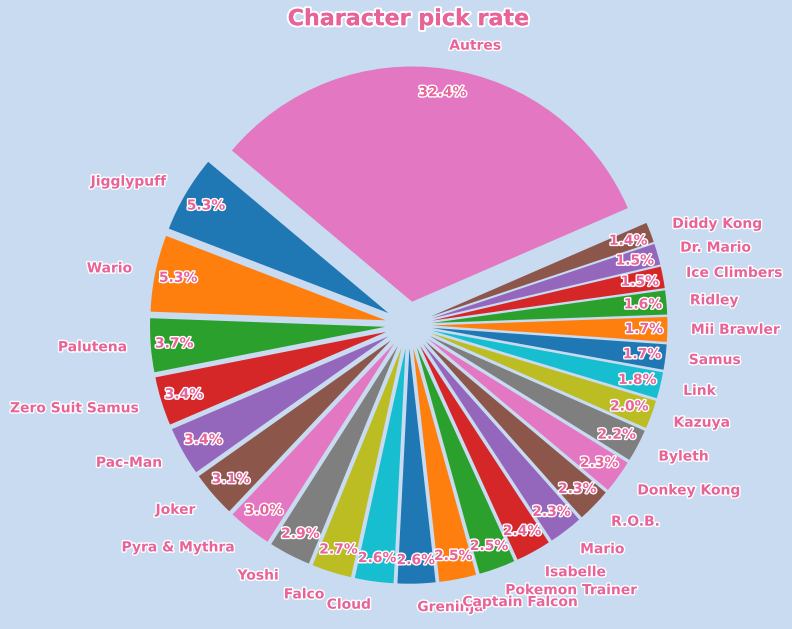

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patheffects as fx

# Your existing code remains the same
df = pd.read_csv('character_data.csv').drop(0)
df = summarize_character_data(df, 2, 0.013)
characters = df["Character"]
games = df["Games"]

explode=[0.1]*(len(df)-1)+[0.1]

# Create the pie chart with white outline for all text
plt.figure(figsize=(8, 20))  # Increase figure size
plt.pie(games, labels=characters, autopct='%1.1f%%', startangle=140, pctdistance=0.9, labeldistance=1.1, explode=explode, 
        textprops={'color': '#E76398', 'path_effects': [fx.withStroke(linewidth=2, foreground='white')], 'fontweight': 'bold', 'fontsize': 10})

# Set the background color
fig = plt.gcf()
fig.patch.set_facecolor('#C8DBF1')  # background colour

# Add title with white outline at a higher position
title_text = plt.text(0.5, 1.02, "Character pick rate", 
                      horizontalalignment='center', verticalalignment='center',
                      transform=plt.gca().transAxes,
                      fontweight='bold', fontsize=16, color='#E76398',
                      path_effects=[fx.withStroke(linewidth=3, foreground='white'),
                                    fx.Normal()])

# Adjust layout to ensure title visibility
plt.tight_layout(rect=[0, 0, 1, 0.92])  # Adjusted to give more space at the top

plt.show()

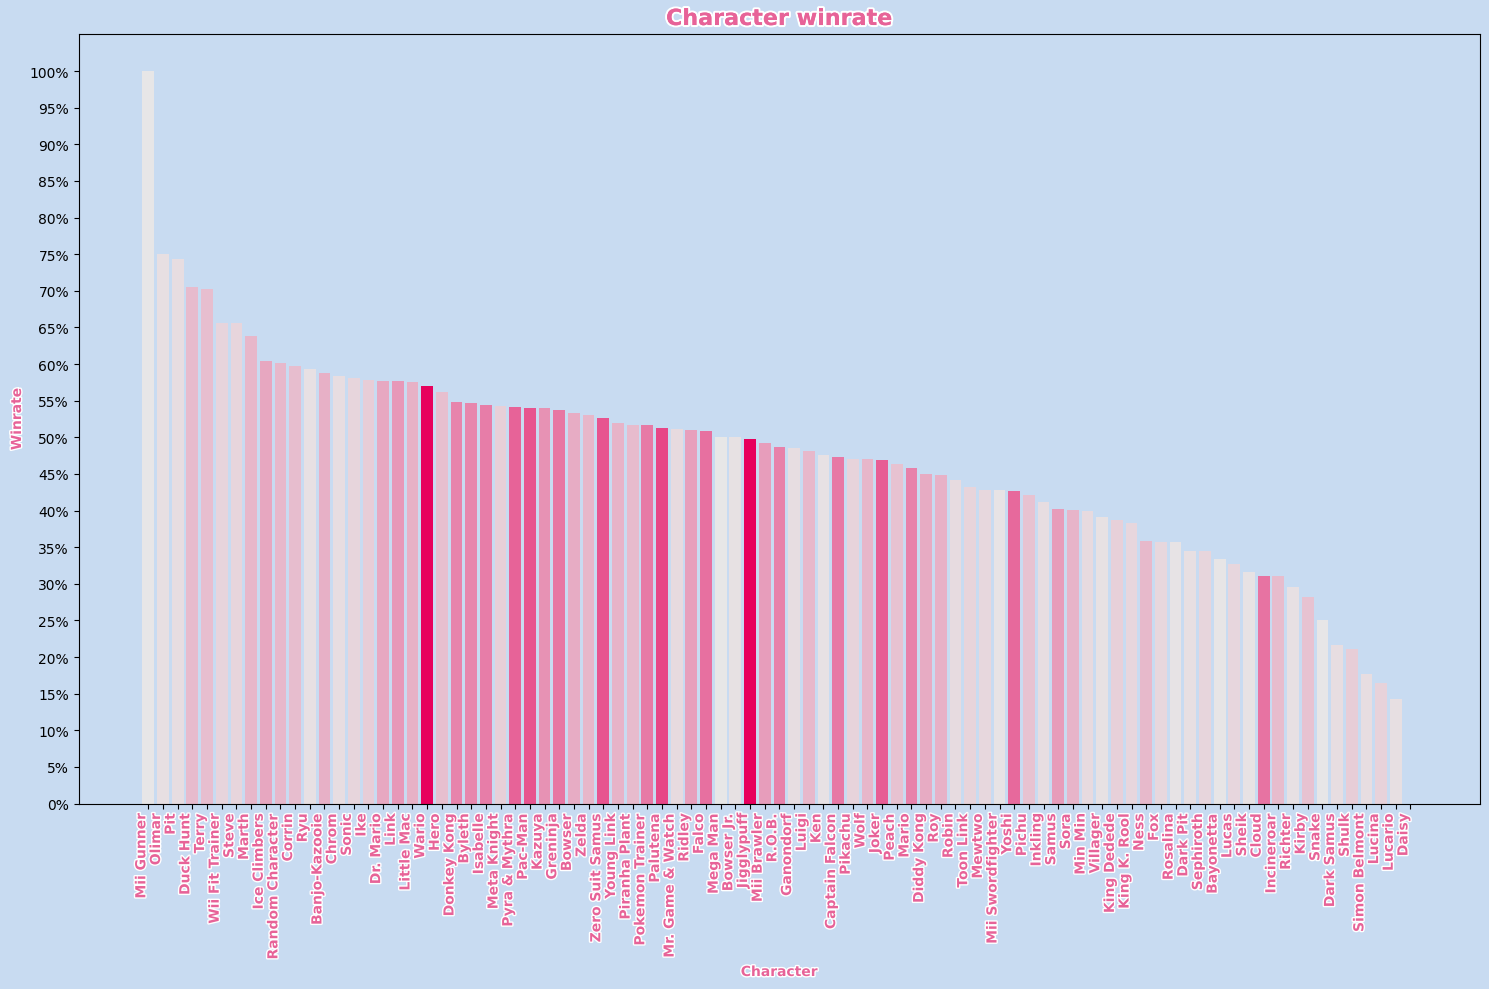

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a DataFrame named 'df'
# Sort the DataFrame by 'Winrate' in descending order
df = pd.read_csv('character_data.csv').drop(0)
sorted_df = df.sort_values(by='Winrate', ascending=False)

# Create the bar plot
fig, ax = plt.subplots(figsize=(15, 10))
width = 0.8 / len(sorted_df)
x = range(len(sorted_df))

# Determine the range of games played
min_games = sorted_df['Games'].min()
max_games = sorted_df['Games'].max()

# Create color map normalization
norm = plt.Normalize(vmin=min_games, vmax=max_games)

# Plot bars with custom colors based on games played
for i, row in enumerate(sorted_df.iterrows()):
    character = row[1]['Character']
    winrate = row[1]['Winrate']*100
    games = row[1]['Games']
    saturation = (games - min_games) / (max_games - min_games)
    color_hsv=(hex2hsv("#E76398")[0], saturation, hex2hsv("#E76398")[2])
    color_rgb = colorsys.hsv_to_rgb(color_hsv[0],color_hsv[1],color_hsv[2])
    
    ax.bar(i, winrate, label=character, 
           color=color_rgb)

# Set x-axis tick labels
ax.set_xticks(x)
ax.set_xticklabels(sorted_df['Character'], rotation=90, ha='right', 
                   fontweight='bold', fontsize=10, color='#E76398',
                   path_effects=[fx.withStroke(linewidth=2, foreground='white')])

# Set y-axis ticks
y_min = 0
y_max = 100
num_ticks = 20
tick_interval = (y_max - y_min) / num_ticks
yticks = np.arange(y_min, y_max + tick_interval, tick_interval)

# Set y ticks
ax.set_yticks(yticks)

# Format y tick labels
ax.set_yticklabels(['{:d}%'.format(int(tick)) for tick in yticks])


# Add labels and title
ax.set_xlabel('Character' ,color = "#E76398",fontweight='bold', fontsize=10,
               path_effects=[fx.withStroke(linewidth=2, foreground='white')])
ax.set_ylabel('Winrate', color = "#E76398",fontweight='bold', fontsize=10,
               path_effects=[fx.withStroke(linewidth=2, foreground='white')])
# ax.set_title('Winrate by Character')
title_text = plt.text(0.5, 1.02, "Character winrate", 
                      horizontalalignment='center', verticalalignment='center',
                      transform=plt.gca().transAxes,
                      fontweight='bold', fontsize=16, color='#E76398',
                      path_effects=[fx.withStroke(linewidth=3, foreground='white'),
                                    fx.Normal()])

# Set background color to #C8DBF1
fig.patch.set_facecolor('#C8DBF1')
ax.patch.set_facecolor('#C8DBF1')

# Adjust layout to prevent overlapping labels
plt.tight_layout()

# Show the plot
plt.show()
